# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
Processing Record 2 of Set 1 | amga
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | luderitz
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | reggane
Processing Record 13 of Set 1 | bernardo de irigoyen
Processing Record 14 of Set 1 | korla
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | bel ombre
Processing Record 18 of Set 1 | jackson
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | shimanovsk
Processing Record 22 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dudinka,69.4058,86.1778,20.13,52,57,8.59,RU,1722178539
1,amga,60.8953,131.9608,14.90,88,61,1.54,RU,1722178541
2,thompson,55.7435,-97.8558,14.09,100,100,3.09,CA,1722178542
3,grytviken,-54.2811,-36.5092,1.35,94,100,1.90,GS,1722178544
4,luderitz,-26.6481,15.1594,17.58,44,0,12.24,NA,1722178545


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,20.13,52,57,8.59,RU,1722178539
1,amga,60.8953,131.9608,14.90,88,61,1.54,RU,1722178541
2,thompson,55.7435,-97.8558,14.09,100,100,3.09,CA,1722178542
3,grytviken,-54.2811,-36.5092,1.35,94,100,1.90,GS,1722178544
4,luderitz,-26.6481,15.1594,17.58,44,0,12.24,NaN,1722178545


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

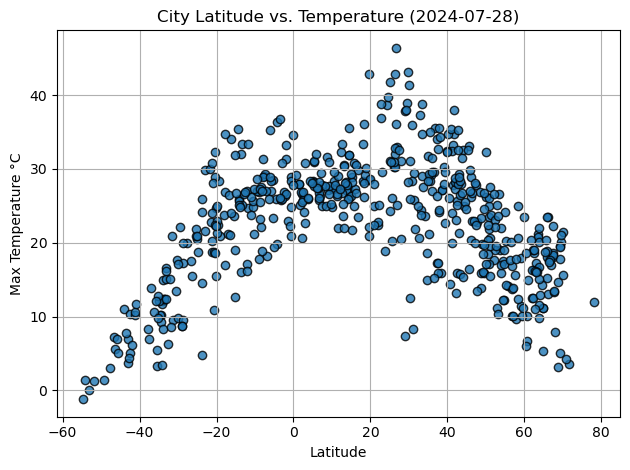

In [152]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format date
date = datetime.now()
date = date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

In [207]:
### The plot showcases the relationship between maximum temperature and 
# latitude for various cities. The plot demonstrates a strong correlation between 
# temperature and latitude. Generally, as you move away from the equator (both northwards and southwards),
# the maximum temperature tends to decrease.

#### Latitude Vs. Humidity

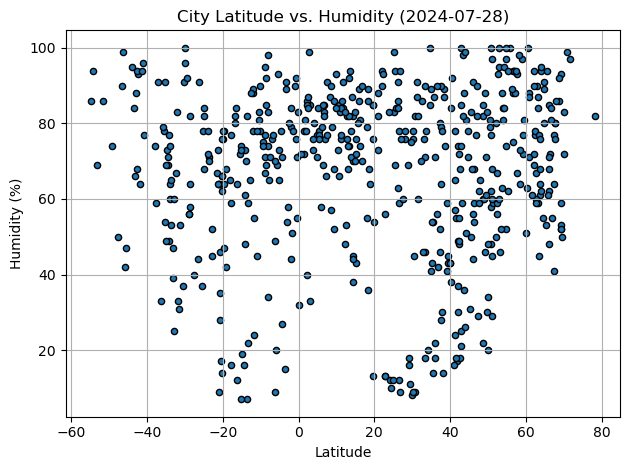

In [153]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
# The plot above hows no clear correlation between humidity levels and latitude 
# for most of the Northern and Southern Hemispher meaning
# that the humidity doesn't consistently increase or decrease as you move north or south. 
# The plot indicates high levels of humidity close to the equator.

#### Latitude Vs. Cloudiness

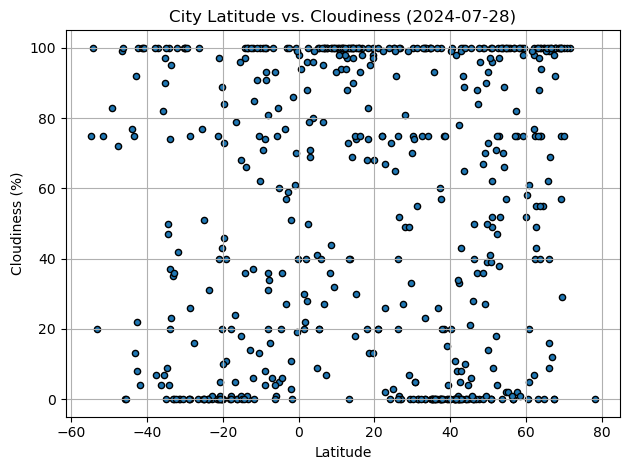

In [154]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

In [168]:
## The plot above shows no significant correlation between latitude and cloudiness in both hemispheres.
# This could be due to cloudiness is influenced more by local weather patterns, geographical features, 
# and seasonal variations rather than latitude alone.

#### Latitude vs. Wind Speed Plot

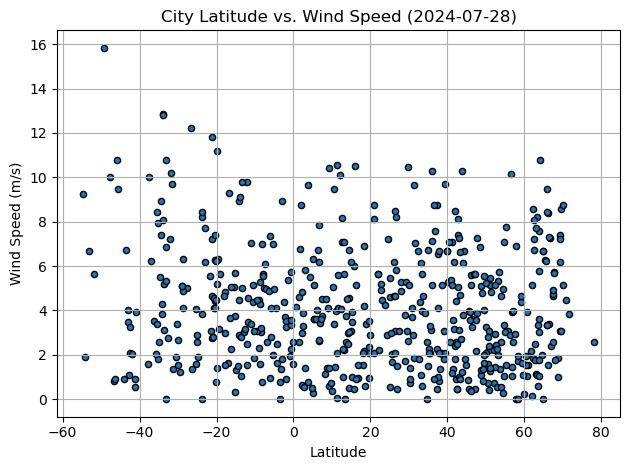

In [155]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

In [206]:
# The plot above shows no significant correlation between speed and latitude in both hemispheres.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [184]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [156]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,20.13,52,57,8.59,RU,1722178539
1,amga,60.8953,131.9608,14.90,88,61,1.54,RU,1722178541
2,thompson,55.7435,-97.8558,14.09,100,100,3.09,CA,1722178542
5,whitehorse,60.7161,-135.0538,10.05,87,20,1.03,CA,1722178546
6,qaqortoq,60.7167,-46.0333,6.73,71,5,3.91,GL,1722178548


In [157]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,1.35,94,100,1.90,GS,1722178544
4,luderitz,-26.6481,15.1594,17.58,44,0,12.24,NaN,1722178545
8,port-aux-francais,-49.3500,70.2167,1.34,74,83,15.83,TF,1722178552
9,west island,-12.1568,96.8225,26.99,78,6,9.77,CC,1722178553
11,bernardo de irigoyen,-26.2552,-53.6458,15.56,91,100,1.36,AR,1722178557


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.5904571959366873


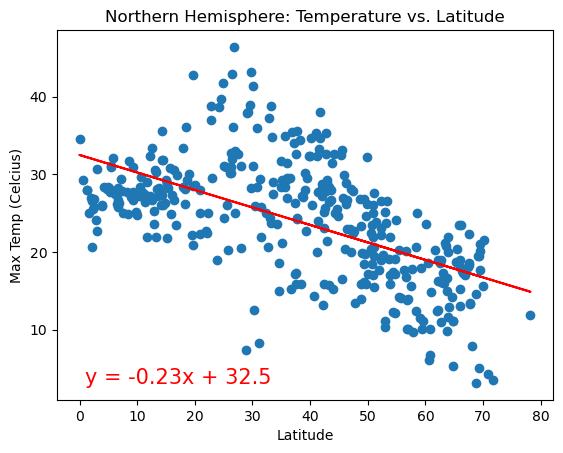

In [198]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Define a function to create Linear Regression plots
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is {rvalue}')

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (1, 3), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celcius)")
plt.title("Northern Hemisphere: Temperature vs. Latitude")
plt.show()



The r-value is 0.8313589113670378


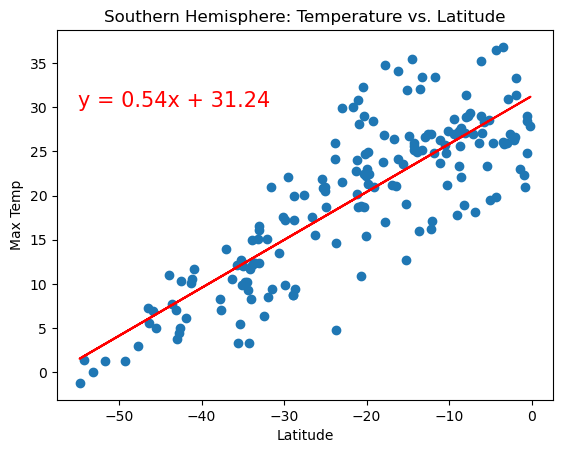

In [176]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere: Temperature vs. Latitude")
print(f'The r-value is {rvalue}')


**Discussion about the linear relationship:**  
In the Northern Hemisphere, the relationship between Latitiude and Max Temperature
is interpretated by looking at the negative correlation coefficient indicates a strong negative linear relationship. 
As latitude increases (moving northward), the maximum temperature decreases. This is consistent with the expectation that regions closer to the poles are generally cooler than those closer to the equator. The r-value of -0.590457 suggests a significant inverse relationship, meaning higher latitudes are associated with lower maximum temperatures.

In the Southern Hemisphere, the positive correlation coefficient suggests a moderate to strong positive linear relationship. As latitude increases (moving towards the equator), the maximum temperature rises. This is expected as regions closer to the equator receive more direct sunlight throughout the year. The r-value of ~0.831358 indicates a noticeable pattern where higher latitudes (closer to the equator) are associated with higher maximum temperatures.


### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.008623159955085278


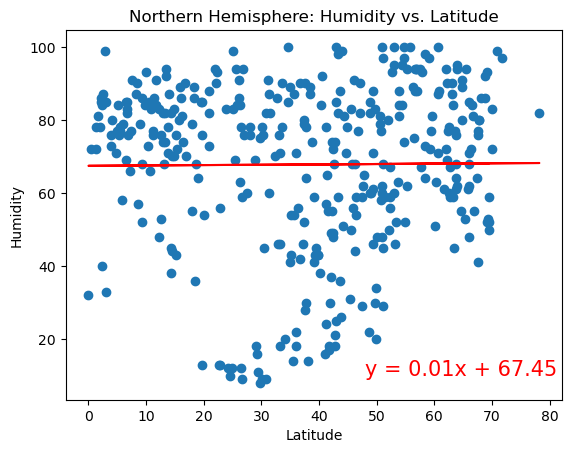

In [199]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(48,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Humidity vs. Latitude")
print(f'The r-value is {rvalue}')


The r-value is -0.09161788592899482


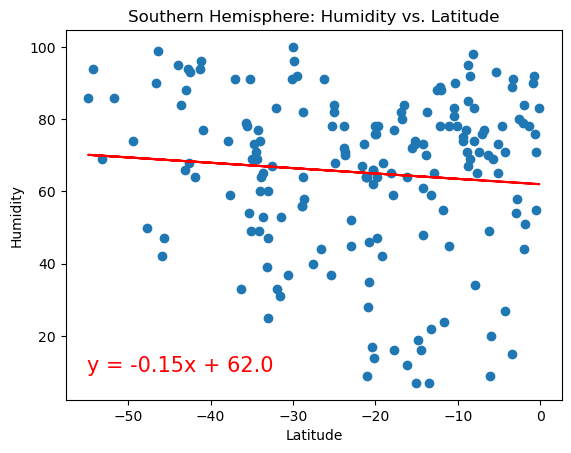

In [200]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Humidity vs. Latitude")
print(f'The r-value is {rvalue}')


**Discussion about the linear relationship:** There is little to no relationship between latitude and humidity based on the data available. The primary conclusion is that there is little to no significant relationship between latitude and humidity according to the available data. This is an important finding, as it challenges potential assumptions about how geographic location might influence humidity levels. The scatter plot of the data points shows a wide spread, indicating high variability in humidity levels across different latitudes. This spread is likely a major factor in the weak correlation observed.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.09702364234603499


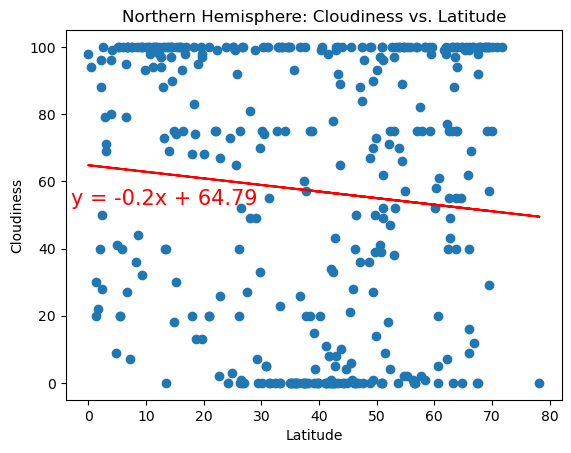

In [180]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-3, 53),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
print(f'The r-value is {rvalue}')


The r-value is -0.033322289404039744


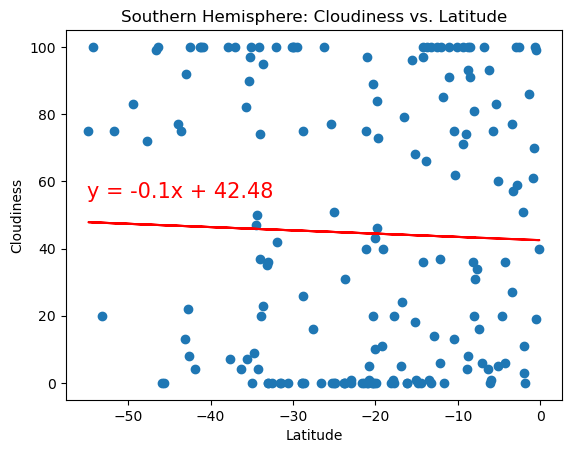

In [181]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
print(f'The r-value is {rvalue}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.0004714998614773215


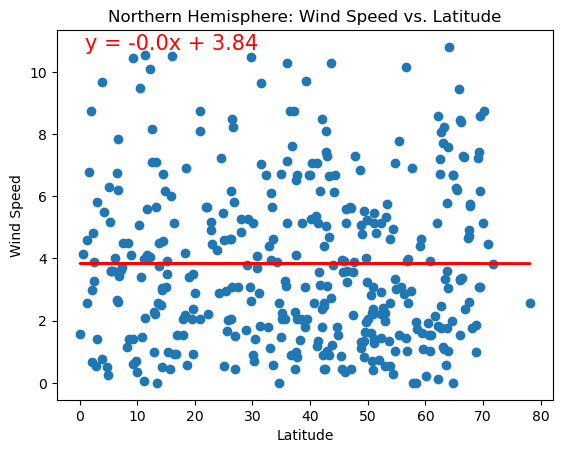

In [182]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,( 1, 10.7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
print(f'The r-value is {rvalue}')


The r-value is -0.20608142939124938


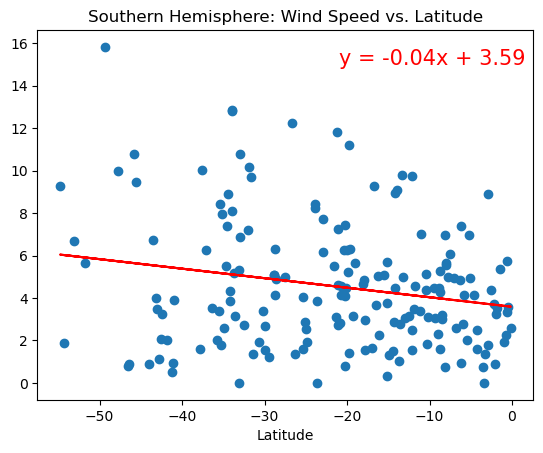

In [183]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-21,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
print(f'The r-value is {rvalue}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE